In [1]:
!pip install --upgrade --quiet  langchain langchain-community langchain-groq neo4j

In [18]:
## Graphdb configuration
NEO4J_URI="bolt://localhost:7687"
NEO4J_USERNAME="neo4j"
NEO4J_PASSWORD="Manith123"


In [19]:
import os
os.environ["NEO4J_URI"]=NEO4J_URI
os.environ["NEO4J_USERNAME"]=NEO4J_USERNAME
os.environ["NEO4J_PASSWORD"]=NEO4J_PASSWORD

In [20]:
from langchain_community.graphs import Neo4jGraph
graph=Neo4jGraph(
    url=NEO4J_URI,
    username=NEO4J_USERNAME,
    password=NEO4J_PASSWORD,
)

In [21]:
graph

In [22]:
# from langchain_groq import ChatGroq
# llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")

from langchain_community.llms import Ollama
llm = Ollama(model="llama3.2:1b")

llm

C:\Users\ashwinir\AppData\Local\Temp\ipykernel_1560\3176399219.py:5: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3.2:1b")


Ollama(model='llama3.2:1b')

In [23]:
from langchain_core.documents import Document
text="""
Elon Reeve Musk (born June 28, 1971) is a businessman and investor known for his key roles in space
company SpaceX and automotive company Tesla, Inc. Other involvements include ownership of X Corp.,
formerly Twitter, and his role in the founding of The Boring Company, xAI, Neuralink and OpenAI.
He is one of the wealthiest people in the world; as of July 2024, Forbes estimates his net worth to be
US$221 billion.Musk was born in Pretoria to Maye and engineer Errol Musk, and briefly attended
the University of Pretoria before immigrating to Canada at age 18, acquiring citizenship through
his Canadian-born mother. Two years later, he matriculated at Queen's University at Kingston in Canada.
Musk later transferred to the University of Pennsylvania and received bachelor's degrees in economics
 and physics. He moved to California in 1995 to attend Stanford University, but dropped out after
  two days and, with his brother Kimbal, co-founded online city guide software company Zip2.
 """
documents=[Document(page_content=text)]
documents

[Document(metadata={}, page_content="\nElon Reeve Musk (born June 28, 1971) is a businessman and investor known for his key roles in space\ncompany SpaceX and automotive company Tesla, Inc. Other involvements include ownership of X Corp.,\nformerly Twitter, and his role in the founding of The Boring Company, xAI, Neuralink and OpenAI.\nHe is one of the wealthiest people in the world; as of July 2024, Forbes estimates his net worth to be\nUS$221 billion.Musk was born in Pretoria to Maye and engineer Errol Musk, and briefly attended\nthe University of Pretoria before immigrating to Canada at age 18, acquiring citizenship through\nhis Canadian-born mother. Two years later, he matriculated at Queen's University at Kingston in Canada.\nMusk later transferred to the University of Pennsylvania and received bachelor's degrees in economics\n and physics. He moved to California in 1995 to attend Stanford University, but dropped out after\n  two days and, with his brother Kimbal, co-founded onlin

In [24]:
!pip install --upgrade --quiet langchain_experimental

In [25]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer=LLMGraphTransformer(llm=llm)

In [26]:
graph_documents=llm_transformer.convert_to_graph_documents(documents)

In [27]:
graph_documents

[GraphDocument(nodes=[], relationships=[], source=Document(metadata={}, page_content="\nElon Reeve Musk (born June 28, 1971) is a businessman and investor known for his key roles in space\ncompany SpaceX and automotive company Tesla, Inc. Other involvements include ownership of X Corp.,\nformerly Twitter, and his role in the founding of The Boring Company, xAI, Neuralink and OpenAI.\nHe is one of the wealthiest people in the world; as of July 2024, Forbes estimates his net worth to be\nUS$221 billion.Musk was born in Pretoria to Maye and engineer Errol Musk, and briefly attended\nthe University of Pretoria before immigrating to Canada at age 18, acquiring citizenship through\nhis Canadian-born mother. Two years later, he matriculated at Queen's University at Kingston in Canada.\nMusk later transferred to the University of Pennsylvania and received bachelor's degrees in economics\n and physics. He moved to California in 1995 to attend Stanford University, but dropped out after\n  two da

In [ ]:
graph_documents

[GraphDocument(nodes=[Node(id='Elon Reeve Musk', type='Person'), Node(id='Maye', type='Person'), Node(id='Errol Musk', type='Person'), Node(id='Pretoria', type='Location'), Node(id='University Of Pretoria', type='Educationalinstitution'), Node(id='Canada', type='Location'), Node(id="Queen'S University At Kingston", type='Educationalinstitution'), Node(id='University Of Pennsylvania', type='Educationalinstitution'), Node(id='California', type='Location'), Node(id='Stanford University', type='Educationalinstitution'), Node(id='Zip2', type='Company'), Node(id='Spacex', type='Company'), Node(id='Tesla, Inc.', type='Company'), Node(id='X Corp.', type='Company'), Node(id='Twitter', type='Company'), Node(id='The Boring Company', type='Company'), Node(id='Xai', type='Company'), Node(id='Neuralink', type='Company'), Node(id='Openai', type='Company'), Node(id='Forbes', type='Organization')], relationships=[Relationship(source=Node(id='Elon Reeve Musk', type='Person'), target=Node(id='Maye', type

In [31]:
graph_documents[0].nodes

[]

In [ ]:
graph_documents[0].relationships

[Relationship(source=Node(id='Elon Reeve Musk', type='Person'), target=Node(id='Maye', type='Person'), type='PARENT'),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person'), target=Node(id='Errol Musk', type='Person'), type='PARENT'),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person'), target=Node(id='Pretoria', type='Location'), type='BORN_IN'),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person'), target=Node(id='University Of Pretoria', type='Educationalinstitution'), type='ATTENDED'),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person'), target=Node(id='Canada', type='Location'), type='IMMIGRATED_TO'),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person'), target=Node(id="Queen'S University At Kingston", type='Educationalinstitution'), type='ATTENDED'),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person'), target=Node(id='University Of Pennsylvania', type='Educationalinstitution'), type='ATTENDED'),
 Relationship(source=No

In [ ]:
### Load the dataset of movie

movie_query="""
LOAD CSV WITH HEADERS FROM
'https://raw.githubusercontent.com/tomasonjo/blog-datasets/main/movies/movies_small.csv' as row

MERGE(m:Movie{id:row.movieId})
SET m.released = date(row.released),
    m.title = row.title,
    m.imdbRating = toFloat(row.imdbRating)
FOREACH (director in split(row.director, '|') |
    MERGE (p:Person {name:trim(director)})
    MERGE (p)-[:DIRECTED]->(m))
FOREACH (actor in split(row.actors, '|') |
    MERGE (p:Person {name:trim(actor)})
    MERGE (p)-[:ACTED_IN]->(m))
FOREACH (genre in split(row.genres, '|') |
    MERGE (g:Genre {name:trim(genre)})
    MERGE (m)-[:IN_GENRE]->(g))
"""

In [ ]:
graph

In [ ]:
graph.query(movie_query)

[]

In [ ]:
graph.refresh_schema()
print(graph.schema)

Node properties:
Person {born: INTEGER, name: STRING}
Movie {title: STRING, released: INTEGER, id: STRING, imdbRating: FLOAT}
Genre {name: STRING}
Relationship properties:

The relationships:
(:Person)-[:ACTED_IN]->(:Movie)
(:Person)-[:DIRECTED]->(:Movie)
(:Movie)-[:IN_GENRE]->(:Genre)


In [ ]:
from langchain.chains import GraphCypherQAChain
chain=GraphCypherQAChain.from_llm(llm=llm,graph=graph,verbose=True)
chain

GraphCypherQAChain(verbose=True, graph=<langchain_community.graphs.neo4j_graph.Neo4jGraph object at 0x780895f33d60>, cypher_generation_chain=LLMChain(prompt=PromptTemplate(input_variables=['question', 'schema'], template='Task:Generate Cypher statement to query a graph database.\nInstructions:\nUse only the provided relationship types and properties in the schema.\nDo not use any other relationship types or properties that are not provided.\nSchema:\n{schema}\nNote: Do not include any explanations or apologies in your responses.\nDo not respond to any questions that might ask anything else than for you to construct a Cypher statement.\nDo not include any text except the generated Cypher statement.\n\nThe question is:\n{question}'), llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x780892c69870>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x780892c6a530>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))), qa_chain=

In [ ]:
response=chain.invoke({"query":"Who was the director of the moview GoldenEye"})

response




> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (m:Movie {title:"GoldenEye"})<-[:DIRECTED]-(p:Person) RETURN p.name 

Full Context:
[{'p.name': 'Martin Campbell'}]

> Finished chain.


{'query': 'Who was the director of the moview GoldenEye',
 'result': 'Martin Campbell  \n'}

In [ ]:
response=chain.invoke({"query":"tell me the genre of th movie GoldenEye"})

response



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (m:Movie {title: "GoldenEye"})-[:IN_GENRE]->(g:Genre) RETURN g.name 

Full Context:
[{'g.name': 'Adventure'}, {'g.name': 'Action'}, {'g.name': 'Thriller'}]

> Finished chain.


{'query': 'tell me the genre of th movie GoldenEye',
 'result': 'Adventure, Action, Thriller \n'}

In [ ]:
response=chain.invoke({"query":"Who was the director in movie Casino"})

response



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (m:Movie{title:"Casino"})<-[:DIRECTED]-(p:Person)
RETURN p.name 

Full Context:
[{'p.name': 'Martin Scorsese'}]

> Finished chain.


{'query': 'Who was the director in movie Casino',
 'result': 'Martin Scorsese  \n'}

In [ ]:
response=chain.invoke({"query":"Which movie were released in 2008"})

response



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (m:Movie) WHERE m.released = 2008 RETURN m.title 

Full Context:
[{'m.title': 'Ironman'}]

> Finished chain.


{'query': 'Which movie were released in 2008',
 'result': "I don't know the answer. \n"}

In [ ]:
response=chain.invoke({"query":"Give me the list of movie having imdb rating more than 8"})
response



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (m:Movie) WHERE m.imdbRating > 8 RETURN m.title  

Full Context:
[{'m.title': 'Toy Story'}, {'m.title': 'Heat'}, {'m.title': 'Casino'}, {'m.title': 'Twelve Monkeys (a.k.a. 12 Monkeys)'}, {'m.title': 'Seven (a.k.a. Se7en)'}, {'m.title': 'Usual Suspects, The'}, {'m.title': 'Hate (Haine, La)'}, {'m.title': 'Braveheart'}, {'m.title': 'Taxi Driver'}, {'m.title': 'Anne Frank Remembered'}]

> Finished chain.


{'query': 'Give me the list of movie having imdb rating more than 8',
 'result': "I don't know the answer. \n"}

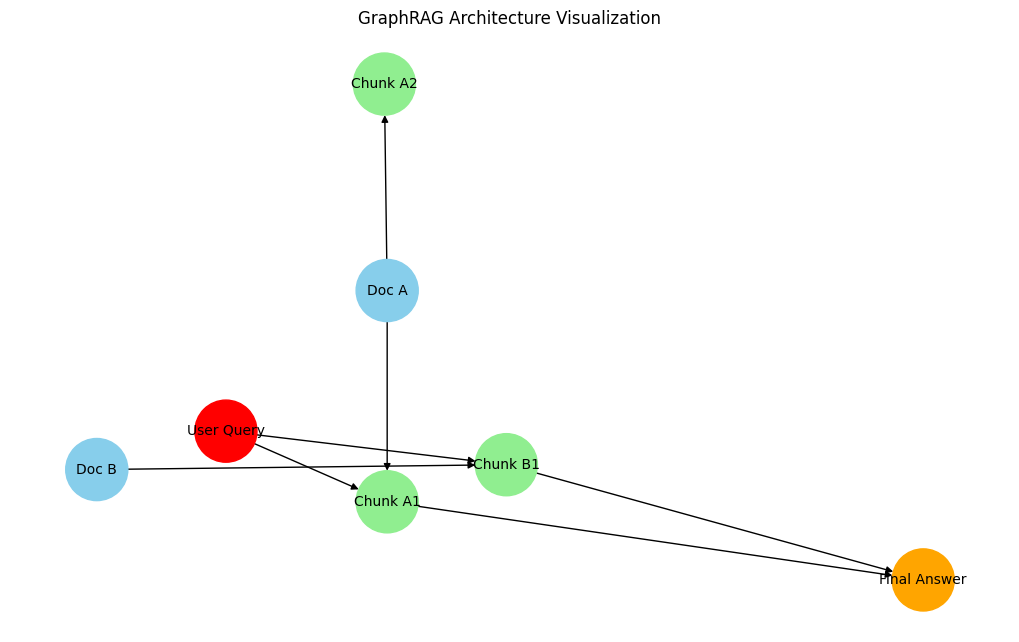

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes: documents, chunks, and a question
G.add_node("User Query", color='red')
G.add_node("Doc A", color='skyblue')
G.add_node("Doc B", color='skyblue')
G.add_node("Chunk A1", color='lightgreen')
G.add_node("Chunk A2", color='lightgreen')
G.add_node("Chunk B1", color='lightgreen')

# Connect documents to chunks (doc decomposition)
G.add_edges_from([
    ("Doc A", "Chunk A1"),
    ("Doc A", "Chunk A2"),
    ("Doc B", "Chunk B1")
])

# Connect query to relevant chunks (via vector retrieval)
G.add_edges_from([
    ("User Query", "Chunk A1"),
    ("User Query", "Chunk B1")
])

# Optional: Connect to synthesized answer
G.add_node("Final Answer", color='orange')
G.add_edge("Chunk A1", "Final Answer")
G.add_edge("Chunk B1", "Final Answer")

# Get colors
colors = [G.nodes[n].get('color', 'gray') for n in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=2000, font_size=10, arrows=True)
plt.title("GraphRAG Architecture Visualization")
plt.show()


In [ ]:
examples = [
    {
        "question": "How many artists are there?",
        "query": "MATCH (a:Person)-[:ACTED_IN]->(:Movie) RETURN count(DISTINCT a)",
    },
    {
        "question": "Which actors played in the movie Casino?",
        "query": "MATCH (m:Movie {{title: 'Casino'}})<-[:ACTED_IN]-(a) RETURN a.name",
    },
    {
        "question": "How many movies has Tom Hanks acted in?",
        "query": "MATCH (a:Person {name: 'Tom Hanks'})-[:ACTED_IN]->(m:Movie) RETURN count(m)",
    },
    {
        "question": "List all the genres of the movie Schindler's List",
        "query": "MATCH (m:Movie {{title: 'Schindler\\'s List'}})-[:IN_GENRE]->(g:Genre) RETURN g.name",
    },
    {
        "question": "Which actors have worked in movies from both the comedy and action genres?",
        "query": "MATCH (a:Person)-[:ACTED_IN]->(:Movie)-[:IN_GENRE]->(g1:Genre), (a)-[:ACTED_IN]->(:Movie)-[:IN_GENRE]->(g2:Genre) WHERE g1.name = 'Comedy' AND g2.name = 'Action' RETURN DISTINCT a.name",
    },
    {
        "question": "Which directors have made movies with at least three different actors named 'John'?",
        "query": "MATCH (d:Person)-[:DIRECTED]->(m:Movie)<-[:ACTED_IN]-(a:Person) WHERE a.name STARTS WITH 'John' WITH d, COUNT(DISTINCT a) AS JohnsCount WHERE JohnsCount >= 3 RETURN d.name",
    },
    {
        "question": "Identify movies where directors also played a role in the film.",
        "query": "MATCH (p:Person)-[:DIRECTED]->(m:Movie), (p)-[:ACTED_IN]->(m) RETURN m.title, p.name",
    },
    {
        "question": "Find the actor with the highest number of movies in the database.",
        "query": "MATCH (a:Actor)-[:ACTED_IN]->(m:Movie) RETURN a.name, COUNT(m) AS movieCount ORDER BY movieCount DESC LIMIT 1",
    },
]